In [1]:
require(gtseries)

Loading required package: gtseries



In [2]:
require(iceages)
data(models)
model <- models$vcv18
init <- c(12,0.,0.4)
times <- seq(-4e4, 0., 0.1) # time unit in this packages is 1000 years = 10 ka

Loading required package: iceages



In [3]:
# standard solution in ice ages, with 6 obliquity and 6 precession terms
Astro <- read_astro(6,6)    

trajectory <- propagate_d(model, times=times, init=init, par=model$spar, Astro)

In [4]:
trajectory <- ts(trajectory, start = times[1]*10, deltat = 1)

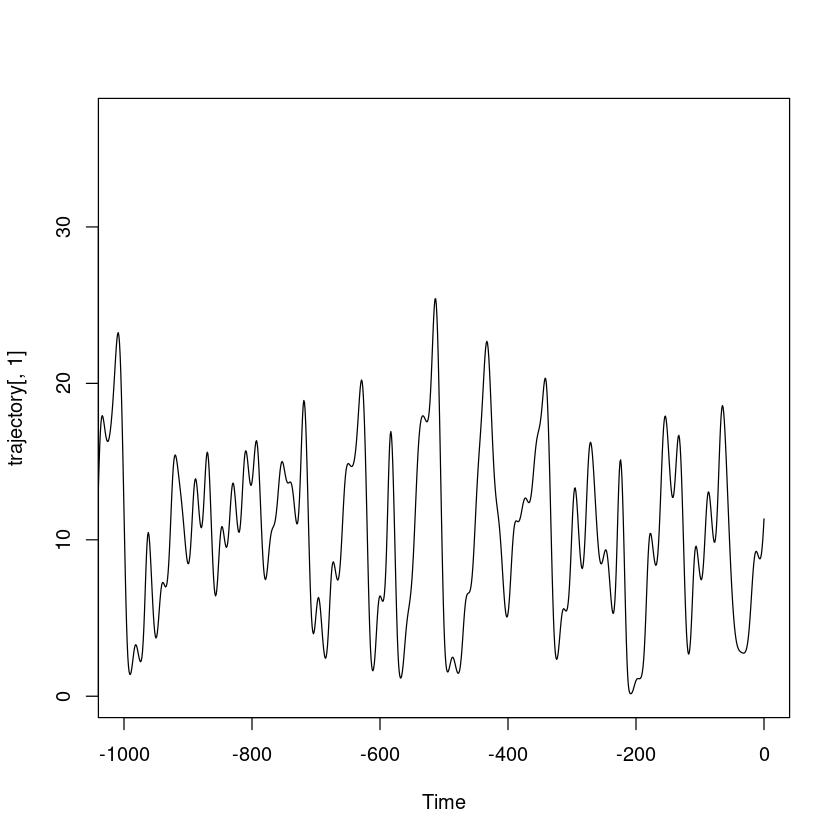

In [5]:
plot(trajectory[,1], xlim=c(-1e3,0))

In [6]:
M <- mfft_real(trajectory[,1], nfreq=10)

In [7]:
astroFreqs <- c(Astro$omepre, Astro$omeobl)/10.
astroFreqnames <- c(sprintf("p%s", seq(along=Astro$omepre)),sprintf("o%s", seq(along=Astro$omeobl))) 
names(astroFreqs) <- astroFreqnames
tones <- attributeTones(M$Freq, astroFreqs)

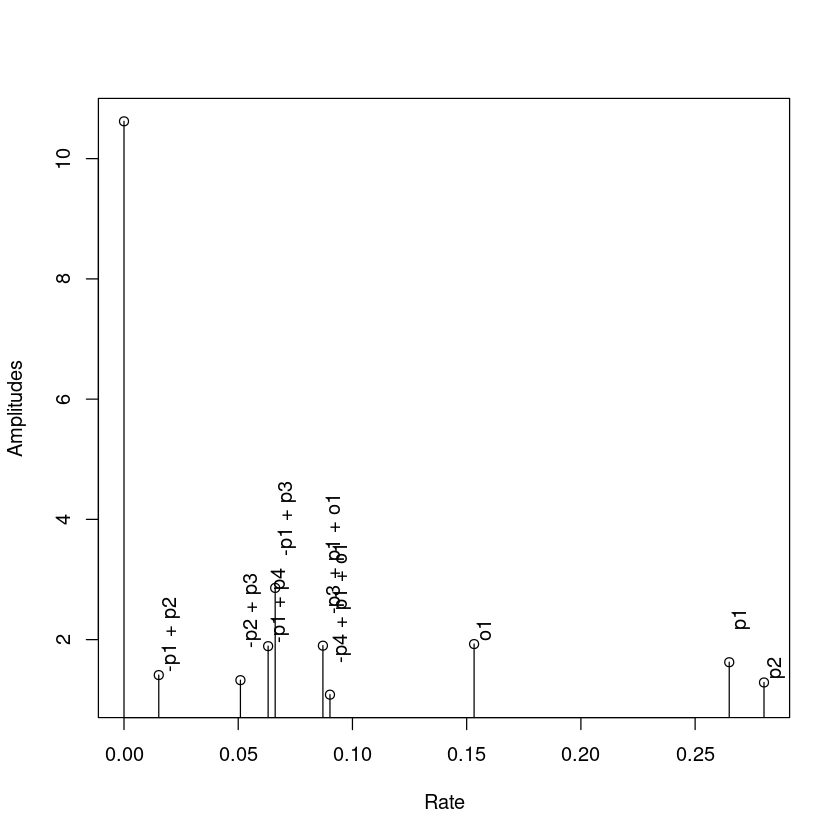

In [8]:
plot(M, labels=tones)

In [9]:
Astro$omepre

[1] 2.649336 2.801514 3.311110 3.280241 3.262118 2.697423

In [10]:
astroFreqnames

[1] "p1" "p2" "p3" "p4" "p5" "p6" "o1" "o2" "o3" "o4" "o5" "o6"

In [11]:
tones

[1] ""              "-p1 + p3"      "o1"            "-p3 + p1 + o1"
 [5] "-p1 + p4"      "p1"            "-p1 + p2"      "-p2 + p3"     
 [9] "p2"            "-p4 + p1 + o1"

In [12]:
print(M$Freq,5)
print(2*pi/M$Freq, 4)

 [1] 0.000000 0.066177 0.153249 0.087072 0.063090 0.264934 0.015218 0.050960
 [9] 0.280151 0.090159
 [1]   -Inf  94.94  41.00  72.16  99.59  23.72 412.88 123.30  22.43  69.69


In [13]:
print(astroFreqs, 5)

     p1      p2      p3      p4      p5      p6      o1      o2      o3      o4 
0.26493 0.28015 0.33111 0.32802 0.32621 0.26974 0.15325 0.15815 0.11719 0.15506 
     o5      o6 
0.21733 0.15016 


In [14]:
.33111-0.26493

[1] 0.06618